In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets = pd.read_csv('Elon_musk.csv',encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


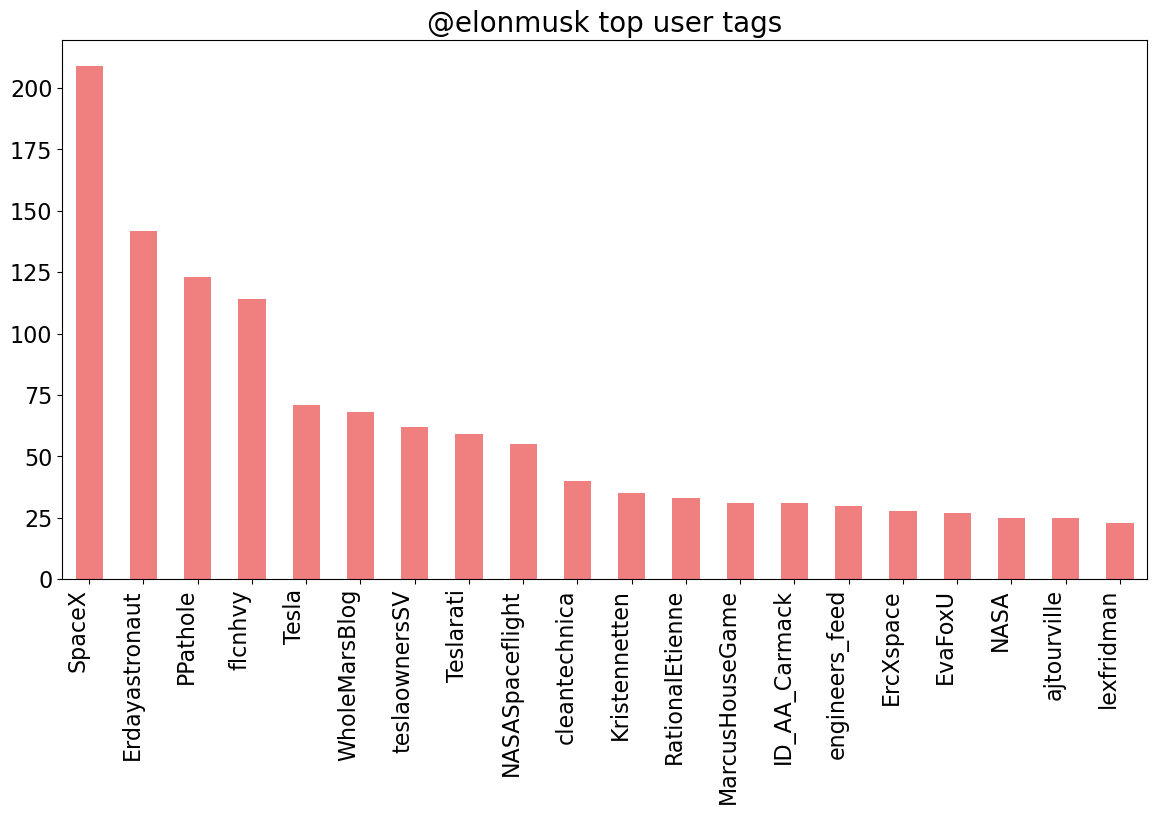

In [4]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14,7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

1)In the plot showing top 20 twitter users,These users might be influencers, collaborators, or entities frequently associated with Elon Musk in the context of the provided tweets.

2)By Obeserving SpaceX is the most commonly mentioned witter handle.

3)SpaceX is  frequently mentioned alongside Elon Musk might be influencers or opinion leaders in the topics related to him.

# Cleaning the text by removing irrelevant information

In [5]:
#Removing All the Special Characters from the text.
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)


,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


# Word Frequency

In [6]:
# To find out word frequneciese in the top 20 users.
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

1)The most common words in the top 20 users' tweets are generic English stopwords like "the," "to," "a," "is," and "of." These words are very common in the English language and often don't carry specific meaning in the context of the tweets.

2)Among the meaningful words, "SpaceX" and "Tesla" stand out. This indicates a significant focus on these two topics within the tweets related to the top 20 users. It suggests that discussions often revolve around SpaceX's space-related activities and Tesla's electric vehicles or other initiatives.

3)The username "erdayastronaut" appears as a significant term. This suggests that there are frequent discussions or interactions related to this specific Twitter user. 

4)The high frequency of certain words, especially related to SpaceX and Tesla, suggests that these topics are of significant interest within the community discussing the top 20 users. 

# Removing Stopwords

In [7]:
!pip install  nltk

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mandar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


Word Frequency after Removal of Stopwords

In [10]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

1)Even after removing stopwords, "spacex" and "tesla" continue to dominate the conversation. 

2)"erdayastronaut," "ppathole," "flcnhvy," and "teslaownerssv": These usernames continue to be highly mentioned, signifying ongoing interactions or collaborations with these specific Twitter users

3)Terms like "great," "good," "yes," and "yeah" persist, indicating positive sentiment and agreement within the discussions. Users express approval, enthusiasm, and agreement, contributing to a positive atmosphere.

4)"wholemarsblog," "teslarati," "nasaspaceflight," and "cleantechnica": These terms still appear frequently, indicating continued engagement with specific blogs or websites related to space, Tesla, and clean technology.

# Count vectoriser tells the frequency of a word.

In [11]:
!pip install --upgrade scikit-learn

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


1)The frequency column represents the normalized frequency of each term, indicating its proportion in the overall vocabulary. These frequencies are useful for understanding the relative importance of each term in the dataset.

2)Many terms have low occurrences (e.g., 1 or 2), indicating that the vocabulary used in the tweets is extensive and individuals words are not frequently repeated.

3)Some terms like "absolutely" have higher occurrences (15 in this case), suggesting that certain words are used more frequently and might play a significant role in the discussions.

4)Specific terms related to space missions, technical details, or specialized topics might have low occurrences but are essential in understanding the context of the tweets. For example, terms like "abort" and "aber" might be specific to discussions about space-related topics.

# TFIDF - Term frequency inverse Document Frequencyt

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1)The analysis focuses on the top 1000 most frequent words. This limit helps in narrowing down the vocabulary to the most relevant and commonly occurring words within the tweets.

2)The majority of the entries in the matrix are 0. This sparsity is expected in text data, as most words from a large vocabulary are not present in individual tweets.

3)The values in the matrix represent the TF-IDF scores for each word. Higher TF-IDF values indicate that a word is important in a specific tweet relative to the entire dataset.
  Words with higher TF-IDF scores are likely to be more significant in the context of the specific tweets in which they appear.

4)Words with non-zero TF-IDF values are the ones that differentiate tweets from each other. These words are crucial in distinguishing the content of individual tweets within the dataset.
    

# N-gram
# Bi-gram

In [14]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


# Bi-gram plot

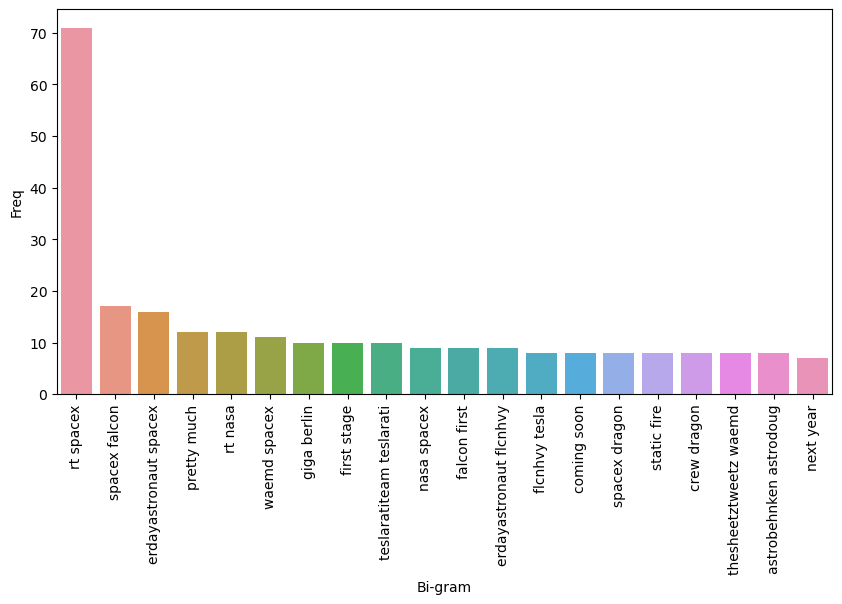

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

1_)The frequency counts provided in the output show how often these specific bigrams occur in the given tweets. Higher frequencies indicate more common and repeated discussions about these topics.

2)The presence of bigrams like "rt spacex," "spacex falcon," and "erdayastronaut spacex" indicates a strong focus on SpaceX-related content.

3)The bigrams "teslaratiteam teslarati" suggest engagement with specific user communities on Twitter, possibly indicating active interactions or discussions within these groups.

4)Bigrams like "waemd spacex" and "rt nasa" indicate collaborations or mentions involving other Twitter users, possibly amplifying content related to SpaceX or space-related topics.

5)The bigram "giga berlin" likely refers to Tesla's Gigafactory in Berlin, indicating discussions about Tesla's manufacturing plant in Germany.

6)Phrases like "first stage" and "falcon first" suggest discussions about technical aspects of SpaceX's project, possibly related to their design, performance, or reusability.

7)Bigrams like "pretty much" don't convey specific technical information but might indicate positive sentiment.

8)The bigram "nasa spacex" indicates discussions or collaborations between NASA and SpaceX, which are common topics of interest within the community.

# Tri-gram

In [17]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


# Tri-gram plot

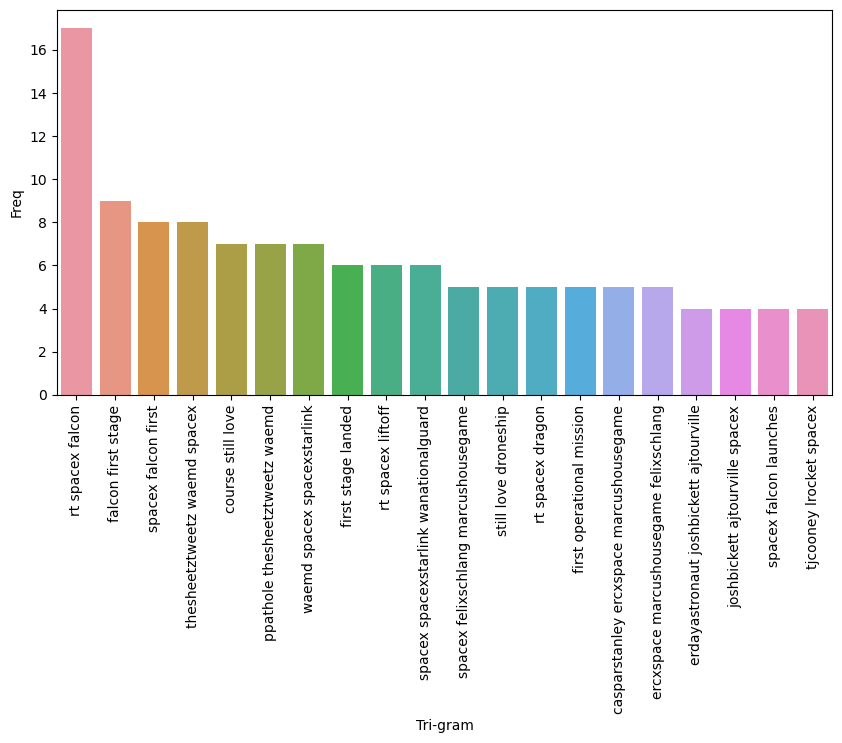

In [19]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

1)The trigrams provide a detailed view of key phrases and discussions within the tweets.

2)Trigrams like "rt spacex falcon" and "falcon first stage" indicate discussions about specific SpaceX activities, emphasizing the community's interest in SpaceX's Falcon rockets and their first stage landings.

3)Trigrams such as "ppathole thesheetztweetz waemd" and "waemd spacex spacexstarlink" suggest interactions between users and collaborations involving platforms like "ppathole" and "waemd." These interactions might involve discussions, retweets, or joint initiatives related to SpaceX.

4)The trigram "course still love" implies positive sentiment, indicating users expressing their ongoing affection or admiration, likely for SpaceX or related topics

5)Phrases like "spacex spacexstarlink wanationalguard" and "spacex felixschlang marcushousegame" hint at community engagements, possibly involving events, collaborations, or discussions related to SpaceX and associated entities.

6)Trigrams like "rt spacex liftoff" highlight discussions around SpaceX launches ("liftoff"), indicating active engagement with real-time updates about rocket launches.

7)Trigrams like "ppathole thesheetztweetz waemd" and "spacex felixschlang marcushousegame" might involve specific individuals or Twitter handles, suggesting active discussions or collaborations involving these personalities within the community.

# Creating a Worlcloud

In [20]:
string_Total = " ".join(tweets["Text"])

In [21]:
!pip install wordcloud
!pip install textblob

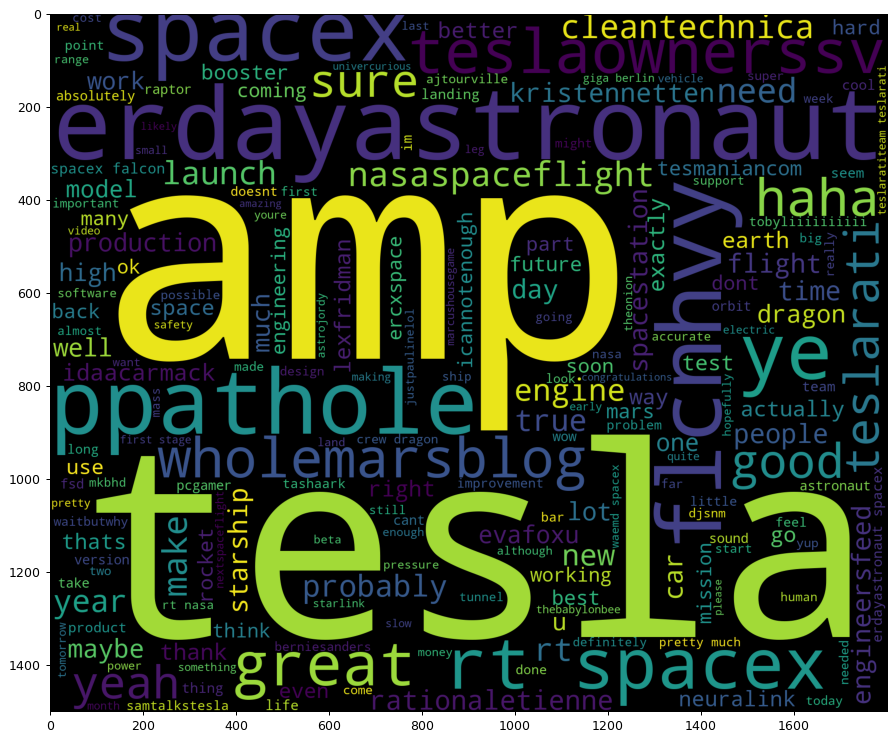

In [22]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

1)The word cloud highlights the most frequent words in the entire corpus, with larger and bolder words indicating higher frequency. This gives an immediate visual sense of the prominent keywords within the tweets.

2)Given the context of the dataset, the word "spaceX",is likely to be one of the largest and most prominent words in the cloud. This emphasizes the strong focus on SpaceX-related discussions within the tweets.

3)Besides "SpaceX," other specific entities like "Tesla", "amp", "ppathole","erdayastronaut" or even specific user handles might be prominent, indicating discussions and interactions related to these entities.

4)Positive expressions or words indicating enthusiasm and approval, such as "good", "better", or "great" might stand out in the word cloud, reflecting the positive sentiment of the discussions.

5)Technical terms related to space exploration and technology, like "rocket," "launch," "test," or "spacestation," could be visible, indicating detailed discussions about SpaceX's technology and advancements.

6)Common English words like "the," "and," or "is" are likely to be present but would be much smaller and less prominent due to their high frequency and low relevance in understanding specific topics.

7)The variability in word sizes indicates the range of word frequencies. Smaller words might be more specific or niche terms, while larger words are likely more general or commonly discussed topics.

# Subjectivity and Polarity

In [23]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


1)Exploring the relationship between sentiment scores and specific topics or entities (e.g., SpaceX, Tesla) within the tweets can provide deeper insights into the community's sentiments about these subjects.

2)Tweets with subjectivity scores close to 1.0 (e.g., "im alien," "happy new year ox," "entertaining outcome likely") are highly subjective. These tweets likely contain personal opinions, emotions, or sentiments expressed by the users.

3)Tweets with subjectivity scores close to 0.0 (e.g., "idaacarmack ray tracing cyberpunk hdr nextleve...," "doge underestimated," "givedirectly sent") are less subjective. These tweets appear to be more factual or objective in nature without expressing strong opinions or sentiments.

4)Tweets with positive polarity scores (e.g., "joerogan spotify great interview," "teslacn congratulations tesla china amazing ex...," "happy new year ox," "owensparks flcnhvy haha thanks," "entertaining outcome likely") indicate positive sentiments or opinions expressed in the tweets

5)Tweets with negative polarity scores (e.g., "im alien," "frodo underdoge thought would fail...") express negative sentiments or opinions.

6)Tweets with polarity scores close to 0.0 (e.g., "idaacarmack ray tracing cyberpunk hdr nextleve...," "doge underestimated," "flcnhvy indeed tweets definitely represent rea...," "givedirectly sent") are relatively neutral and do not strongly convey positive or negative emotions.


# Creating a Worlcloud

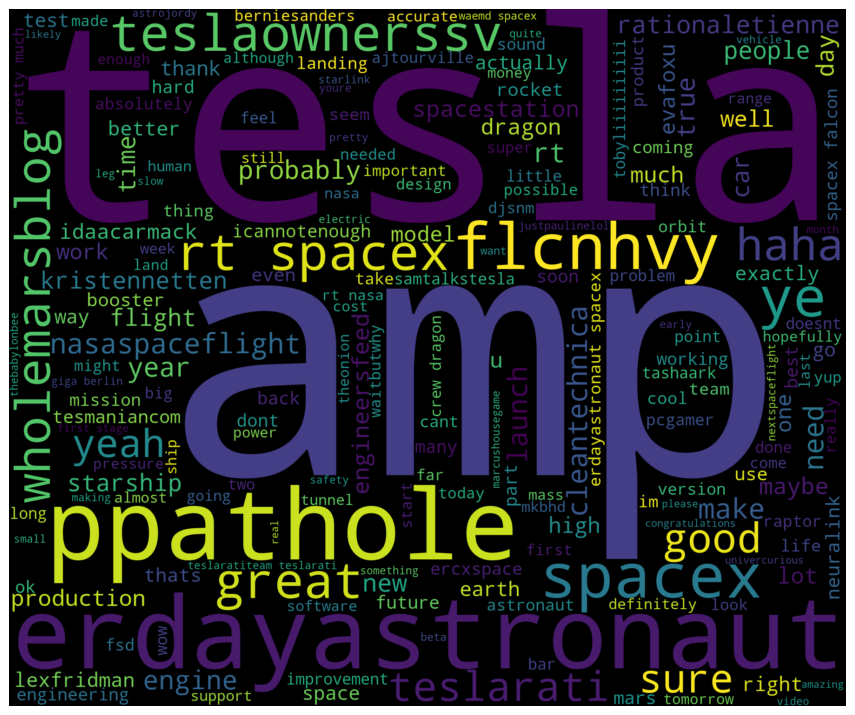

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [25]:
# 1st method Sentiment Analysis of given text using SentimentIntensityAnalyzer 
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2nd method Sentiment Analysis of given text using TextBlob:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [26]:
# Compute The Negative, Neutral, Positive Analysis by using Analysis function
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [27]:
#lets filter the tweet into two categories
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


# POSITIVE TWEETS
1)In the positive tweets The user expresses positivity about Joe Rogan's interview on Spotify. 

2)The user congratulates Tesla China for their exceptional performance in the previous year. 
  This positive sentiment reflects admiration for Tesla's achievements and anticipation for their upcoming events or developments.

3)The user shares New Year's greetings with the ox symbol. This tweet conveys a cheerful and positive tone, reflecting well-wishes for the New Year.

4)The user responds with a positive tone, indicating gratitude ("thanks") and amusement ("haha"). This suggests a friendly and positive interaction, possibly in response to a humorous or pleasant comment.

5) While the context is vague, the phrase "entertaining outcome likely" implies a positive expectation or anticipation for an upcoming event or situation. The user seems optimistic about the outcome.

# NEGATIVE TWEETS

1)The user states "im alien," which might be a playful or metaphorical expression. However, it could also indicate a feeling of being alienated or misunderstood, suggesting a negative sentiment.

2)The user mentions "frodo underdoge" and expresses skepticism,The provided link suggests a reference or context related to the skepticism, but without it, the exact nature of the negativity is unclear.

3)The user criticizes the Freewallet.org app, stating that it "sucks." This straightforward negative sentiment indicates dissatisfaction with the app's functionality or user experience.

4)The tweet discusses the challenges of the Starlink project, acknowledging its complexity.
  Despite the acknowledgment of difficulty, the overall sentiment is not strongly negative but rather realistic or cautious.
 
5)The tweet expresses concern about SpaceX's financial situation, suggesting the need to overcome a significant financial challenge
  This tweet conveys a more serious and critical tone regarding SpaceX's financial outlook.

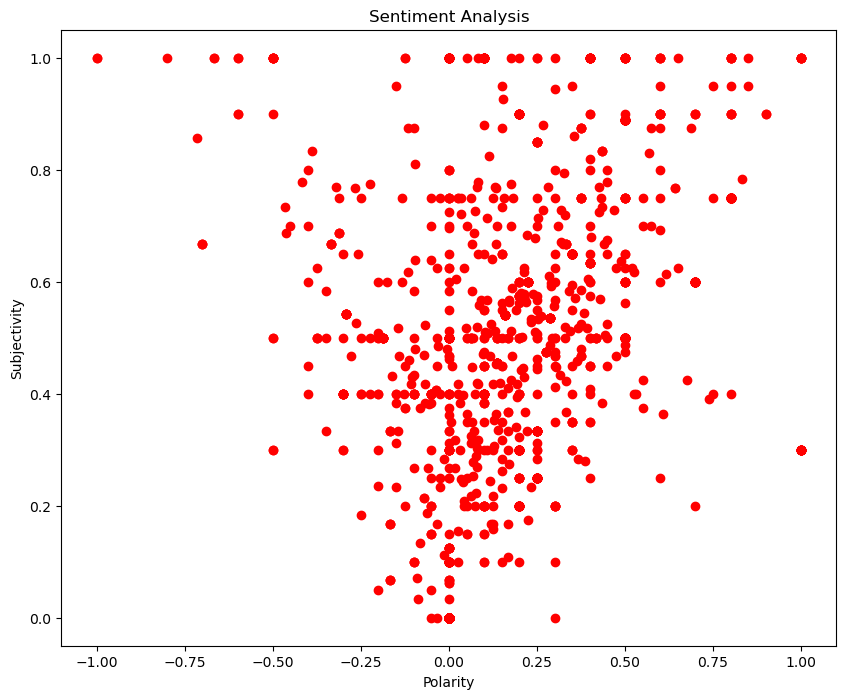

In [28]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

1)The x-axis represents the polarity of tweets, ranging from negative to positive sentiment,
  The y-axis represents the subjectivity of tweets, indicating how subjective or objective the language is.

2)The scatter plot allows visualization of the distribution of sentiments within the dataset. Positive tweets are expected to cluster in the upper right quadrant, indicating positive polarity and subjective language. Negative tweets would cluster in the upper left quadrant, indicating negative polarity and subjective language. Objective statements, regardless of sentiment, would be found in the lower half of the plot.

3)The spread of points across the plot indicates the variability in sentiments among the tweets. A wider distribution suggests diverse sentiments, while a concentrated cluster suggests a more consistent sentiment within the dataset.

4)Outliers or points located far from the main cluster could represent tweets with extremely positive or negative sentiments,like polarity (1.00) and subjectivity(almost 0.3)

5)Examining the overall pattern of the scatter plot can reveal trends in sentiment. For example, if there is a noticeable upward trend, it indicates a correlation between polarity and subjectivity, suggesting that more subjective tweets tend to be more positive.

In [29]:
# calculates the percentage of positive tweets relative to negative tweets in the dataset
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

# Colclusion:The ratio of positive to negative tweets being significantly greater than 100% indicates a dominance of positive sentiment. hence that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.
